## Part I -Prosper Loan Data
## By. Muluneh .
### Introduction
This dataset contains loan information of about 113,937 rows with 81 variables on each
loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

I am looking forward to investigate the following questions

##  Data Gathering

In [90]:
#import all packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [91]:
# Load the dataset
df_lone = pd.read_csv('prosperLoanData.csv')

In [92]:
# display few rows
df_lone.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [93]:
# display the dimension
df_lone.shape

(113937, 81)

In [94]:
# Check the data type and null values
df_lone.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

## Data Assessing and Cleaning
<ol>
<li>Choose some columns from the dataset which is  interested for the analysis  </li>
<li>Drop duplicated rows according to the datset description </li>
<li>Removed rows with null values.</li>
<li>Remove the missed data columns</li>
</ol>

In [95]:
# choose some columns from the dataset which is interested for the analysis
column_list = ['Term','LoanStatus','BorrowerAPR','LenderYield','EstimatedLoss','ProsperRating (Alpha)',
               'BorrowerState','Occupation','EmploymentStatus','DebtToIncomeRatio','IncomeRange',
               'StatedMonthlyIncome','LoanOriginalAmount','MonthlyLoanPayment','PercentFunded']

In [96]:
# from the Selected dataset create a new data frame
df_new = df_lone[column_list]
df_new.sample(10)

,Term,LoanStatus,BorrowerAPR,LenderYield,EstimatedLoss,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded
108442,60,Completed,0.32680,0.2897,0.1190,D,MI,Engineer - Mechanical,Employed,NaN,"$50,000-74,999",6041.666667,7000,226.34,1.0
53083,36,Chargedoff,0.25781,0.2099,0.0925,D,AZ,Other,Other,0.80,"$25,000-49,999",2500.000000,2500,95.46,1.0
22899,36,Completed,0.13052,0.0850,0.0650,C,VA,Accountant/CPA,Full-time,0.01,"$50,000-74,999",4766.666667,1000,32.03,1.0
112473,36,Current,0.18478,0.1459,0.0520,B,NY,Analyst,Employed,0.20,"$100,000+",10375.000000,10000,349.55,1.0
111651,36,Defaulted,0.30564,0.2800,NaN,NaN,TX,Sales - Commission,Full-time,0.24,"$50,000-74,999",5416.666667,3000,125.72,1.0
21599,60,Current,0.16713,0.1340,0.0474,B,CA,Engineer - Chemical,Employed,0.10,"$100,000+",8666.666667,15000,352.14,1.0
41532,60,Current,0.18197,0.1485,0.0624,C,MN,Food Service,Employed,0.41,"$50,000-74,999",4750.000000,15000,363.58,1.0
34672,36,Completed,0.09688,0.0900,NaN,NaN,NC,Sales - Commission,Full-time,0.15,"$75,000-99,999",6666.666667,8500,270.30,1.0
23762,36,Current,0.33215,0.2825,0.1475,E,MI,Professional,Self-employed,NaN,"$100,000+",13833.333333,10000,420.42,1.0
72860,60,Current,0.21474,0.1805,0.0849,C,KS,Other,Employed,0.49,"$25,000-49,999",3000.000000,10000,259.68,1.0


In [97]:
# display the shape
df_new.shape

(113937, 15)

In [98]:
# check the duplicated row in the data frame
print(df_new.duplicated().sum())

911


In [99]:
# Drop duplicated rows according to the dataset description.
df_new = df_new.drop_duplicates()

In [100]:
# check null values
df_new.isna().sum()

Term                         0
LoanStatus                   0
BorrowerAPR                 25
LenderYield                  0
EstimatedLoss            29083
ProsperRating (Alpha)    29083
BorrowerState             5515
Occupation                3529
EmploymentStatus          2255
DebtToIncomeRatio         8438
IncomeRange                  0
StatedMonthlyIncome          0
LoanOriginalAmount           0
MonthlyLoanPayment           0
PercentFunded                0
dtype: int64

In [101]:
# Removed rows with null values
df_new.dropna(inplace=True)

In [102]:
# check the change
df_new.isna().sum()

Term                     0
LoanStatus               0
BorrowerAPR              0
LenderYield              0
EstimatedLoss            0
ProsperRating (Alpha)    0
BorrowerState            0
Occupation               0
EmploymentStatus         0
DebtToIncomeRatio        0
IncomeRange              0
StatedMonthlyIncome      0
LoanOriginalAmount       0
MonthlyLoanPayment       0
PercentFunded            0
dtype: int64

In [103]:
# check the data types 
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75489 entries, 1 to 113936
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Term                   75489 non-null  int64  
 1   LoanStatus             75489 non-null  object 
 2   BorrowerAPR            75489 non-null  float64
 3   LenderYield            75489 non-null  float64
 4   EstimatedLoss          75489 non-null  float64
 5   ProsperRating (Alpha)  75489 non-null  object 
 6   BorrowerState          75489 non-null  object 
 7   Occupation             75489 non-null  object 
 8   EmploymentStatus       75489 non-null  object 
 9   DebtToIncomeRatio      75489 non-null  float64
 10  IncomeRange            75489 non-null  object 
 11  StatedMonthlyIncome    75489 non-null  float64
 12  LoanOriginalAmount     75489 non-null  int64  
 13  MonthlyLoanPayment     75489 non-null  float64
 14  PercentFunded          75489 non-null  float64
dtypes

In [104]:
df_new.shape

(75489, 15)

### What is the structure of your dataset?
> We have 75,489 rows and 15 columns or features. From describe function it seems most of the features are numeric, some are categorical and others are time/periodical features 

### What is/are the main feature(s) of interest in your dataset?

> I am interested in borrowers features and features related to loan or those that affect loan performance to answe the following quations.
- What factors affect a loan’s outcome status?
- What affects the borrower’s APR or interest rate?
- Are there differences between loans depending on how large the original loan amount was?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> In this analysis I will be focusing on the following columns that I suspect has effect on the loan performance  

``` 
['Term','LoanStatus','BorrowerAPR','LenderYield','EstimatedLoss','ProsperRating (Alpha)','BorrowerState','Occupation','EmploymentStatus','DebtToIncomeRatio','IncomeRange','StatedMonthlyIncome','LoanOriginalAmount','MonthlyLoanPayment','PercentFunded']
```
> 

In [105]:
# rename ProsperRating (Alpha) to ProsperRating
df_new.rename(columns = {'ProsperRating (Alpha)':'ProsperRating'}, inplace = True)

In [106]:
#check the change
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75489 entries, 1 to 113936
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Term                 75489 non-null  int64  
 1   LoanStatus           75489 non-null  object 
 2   BorrowerAPR          75489 non-null  float64
 3   LenderYield          75489 non-null  float64
 4   EstimatedLoss        75489 non-null  float64
 5   ProsperRating        75489 non-null  object 
 6   BorrowerState        75489 non-null  object 
 7   Occupation           75489 non-null  object 
 8   EmploymentStatus     75489 non-null  object 
 9   DebtToIncomeRatio    75489 non-null  float64
 10  IncomeRange          75489 non-null  object 
 11  StatedMonthlyIncome  75489 non-null  float64
 12  LoanOriginalAmount   75489 non-null  int64  
 13  MonthlyLoanPayment   75489 non-null  float64
 14  PercentFunded        75489 non-null  float64
dtypes: float64(7), int64(2), object(6)


In [107]:
df_new.head(5)

,Term,LoanStatus,BorrowerAPR,LenderYield,EstimatedLoss,ProsperRating,BorrowerState,Occupation,EmploymentStatus,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded
1,36,Current,0.12016,0.0820,0.0249,A,CO,Professional,Employed,0.18,"$50,000-74,999",6125.000000,10000,318.93,1.0
3,36,Current,0.12528,0.0874,0.0249,A,GA,Skilled Labor,Employed,0.15,"$25,000-49,999",2875.000000,10000,321.45,1.0
4,36,Current,0.24614,0.1985,0.0925,D,MN,Executive,Employed,0.26,"$100,000+",9583.333333,15000,563.97,1.0
5,60,Current,0.15425,0.1214,0.0449,B,NM,Professional,Employed,0.36,"$100,000+",8333.333333,15000,342.37,1.0
6,36,Current,0.31032,0.2612,0.1275,E,KS,Sales - Retail,Employed,0.27,"$25,000-49,999",2083.333333,3000,122.67,1.0


## Univariate Exploration
<p>Let's start by looking at the distribution of the main variable of interest<p>
    <P>Categorical </p>
    <ul>
        <li>LoanStatus</li>
        <li>EmploymentStatus</li>
        <li>ProsperRating</li>
        <li>BorrowerState</li>
    </ul>
   <p>Numerical</p>
   <ul>
   <li>Borrower APR</li>
    <li>DebtToIncomeRatio</li>
    <li>MonthlyLoanPayment</li>
    <li>LoanOriginalAmount</li>
    </ul>

## EmploymentStatus Distribution

In [108]:
# check the unique values in the EmploymentStatus columns.
df_new['EmploymentStatus'].unique()

array(['Employed', 'Other', 'Full-time', 'Part-time', 'Retired',
       'Self-employed', 'Not employed'], dtype=object)

In [109]:
# replace Employed by Full-time
df_new['EmploymentStatus'] = df_new['EmploymentStatus'].replace(['Employed'],'Full-time')

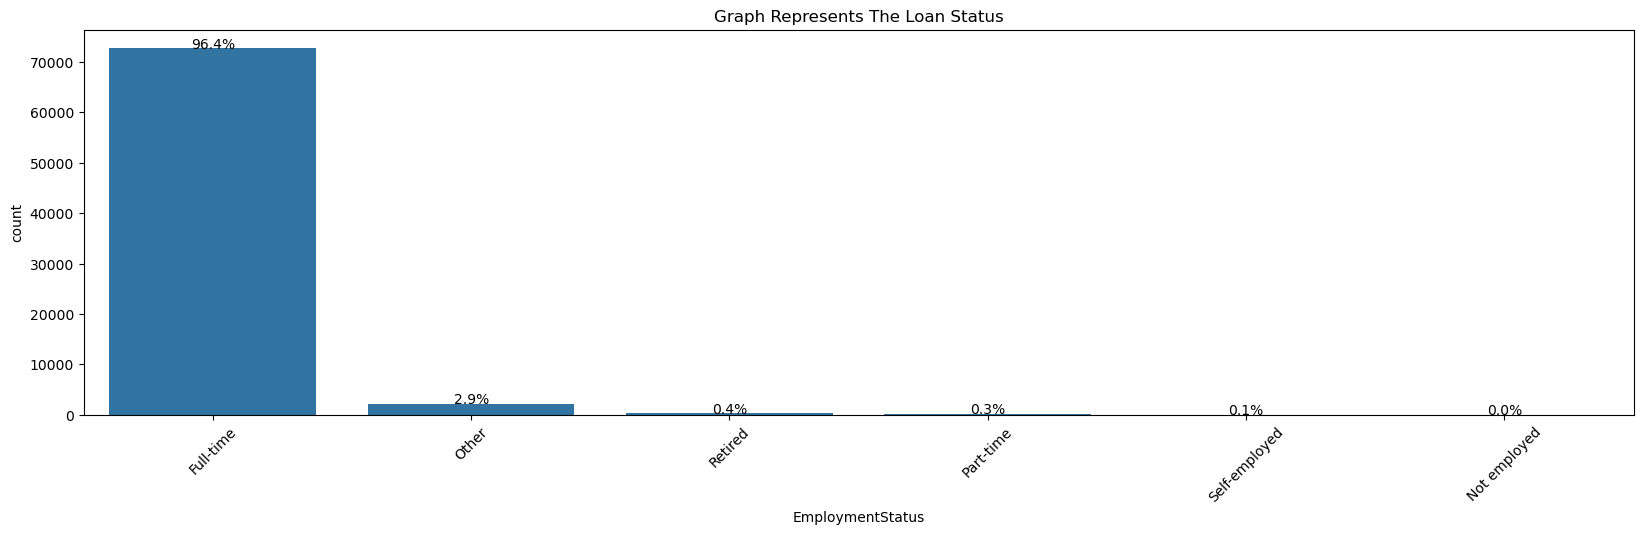

In [110]:
# plot the EmploymentStatus distribution.
base_color = sns.color_palette()[0]
order_index = df_new['EmploymentStatus'].value_counts().index
sns.countplot(data= df_new,x='EmploymentStatus',color = base_color,order=order_index);
type_count = df_new['EmploymentStatus'].value_counts()
n_count = df_new['EmploymentStatus'].value_counts().sum()
key, value = plt.xticks(rotation=45)
# iterate using ziP()function
for v, k in zip(key, value):
    label = type_count[k.get_text()]
    pct_string ='{:0.1f}%'.format(100*label/n_count)
    plt.text(v,label+1,pct_string,ha='center');
from matplotlib import rcParams
rcParams['figure.figsize']= 20,5    
plt.title("Graph Represents The Loan Status");


From  one of the categorical data type employee status distribution most of the customers  are full time worker's which is <strong>96.4%</strong> and the other,retired partime and self-employes are <strong>[2.9,0.4,0.3,0.1]</strong> respectively.

## LoanStatus Distribution

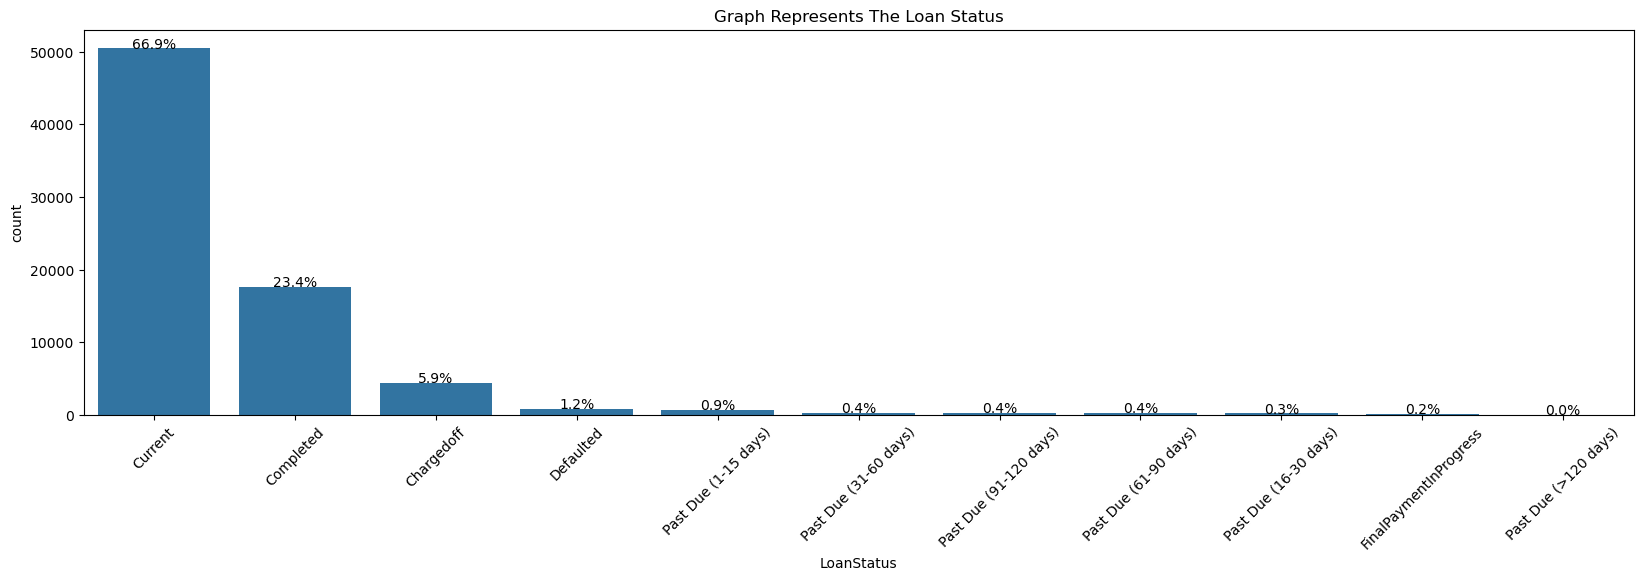

In [111]:
# plot bar chart for loan status
base_color=sns.color_palette()[0]
order_index = df_new['LoanStatus'].value_counts().index
sns.countplot(data=df_new,x='LoanStatus',color=base_color,order=order_index)
type_count = df_new['LoanStatus'].value_counts()
n_count = df_new['LoanStatus'].value_counts().sum()
key, value = plt.xticks(rotation=45)
# iterate using ziP()function
for v, k in zip(key, value):
    label = type_count[k.get_text()]
    pct_string ='{:0.1f}%'.format(100*label/n_count)
    plt.text(v,label+1,pct_string,ha='center');
from matplotlib import rcParams
rcParams['figure.figsize']= 20,5
plt.title("Graph Represents The Loan Status");

<p>As we can see from the categorical lone status graph the current lone satus is 66.7% which is the hightst distrubtion the completed and the chargedoff is the second and the thired heigest distribution respectively.</p>

## ProsperRating Distribution

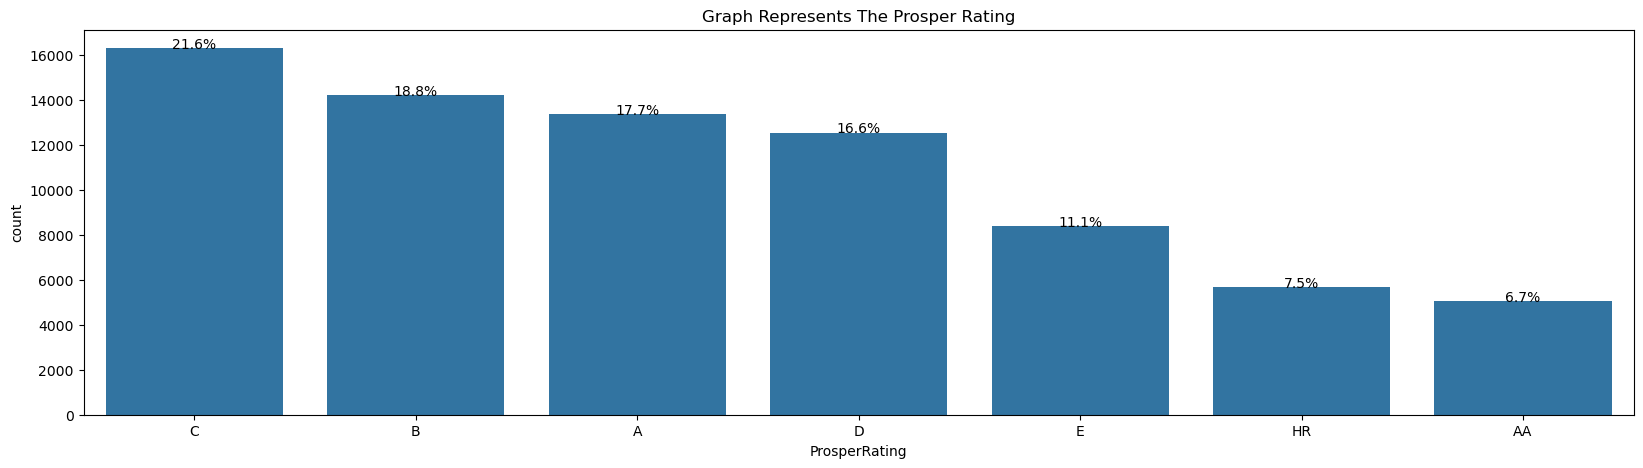

In [112]:
# plot bar chart for prosper rating 
base_color=sns.color_palette()[0]
order_index = df_new['ProsperRating'].value_counts().index
sns.countplot(data=df_new,x='ProsperRating',color=base_color,order=order_index)
type_count = df_new['ProsperRating'].value_counts()
n_count = df_new['ProsperRating'].value_counts().sum()
key, value = plt.xticks(rotation=0)
# iterate using zip() function.
for v, k in zip(key, value):
    labels = type_count[k.get_text()]
    pct_string ='{:0.1f}%'.format(100*labels/n_count)
    plt.text(v,labels+1,pct_string,ha='center');
from matplotlib import rcParams
rcParams['figure.figsize']= 20,5
plt.title("Graph Represents The Prosper Rating");

<p>From the prosper rating grade <strong>C</strong> is the highst rating which is 21.6% the seond and the thired rating is <strong>B</strong> and <strong>A</strong> with 18.4% and 17.7% respectively the last is <strong>AA</strong> with 6.7%</p>

## BorrowerState Distribution

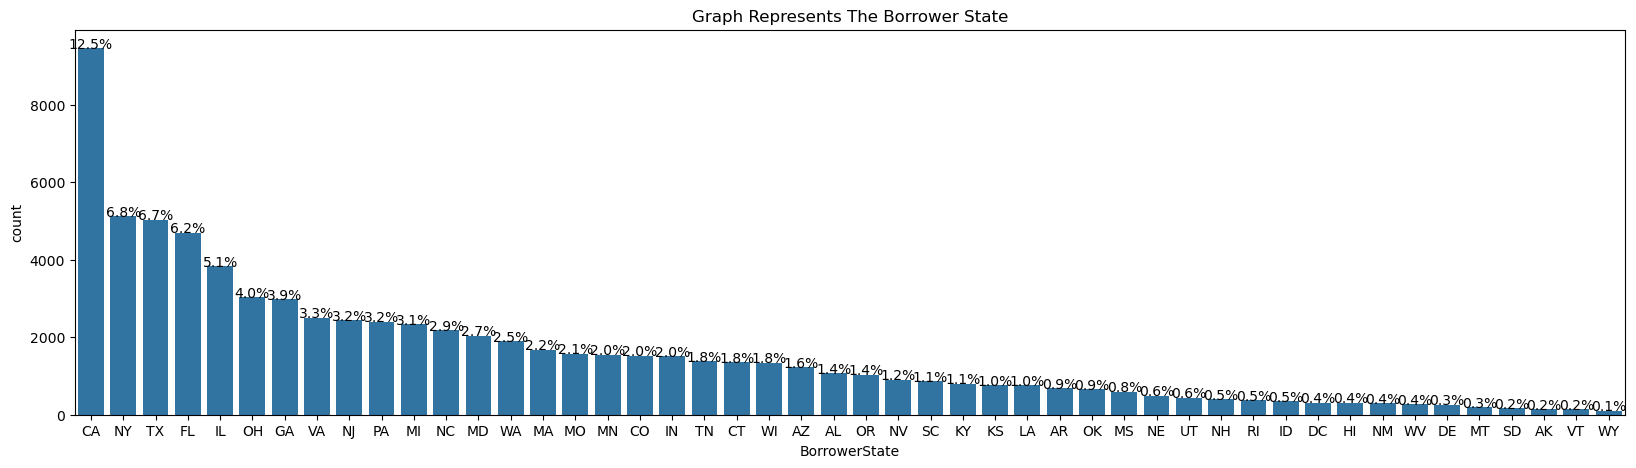

In [113]:
# plot bar chart for borrower state.

base_color=sns.color_palette()[0]
order_index = df_new['BorrowerState'].value_counts().index
sns.countplot(data=df_new,x='BorrowerState',color=base_color,order=order_index)
type_count = df_new['BorrowerState'].value_counts()
n_count = df_new['BorrowerState'].value_counts().sum()
key, value = plt.xticks(rotation=0)
# iterate using zip() function.
for v, k in zip(key, value):
    labels = type_count[k.get_text()]
    pct_string ='{:0.1f}%'.format(100*labels/n_count)
    plt.text(v,labels+1,pct_string,ha='center');
from matplotlib import rcParams
rcParams['figure.figsize']= 20,5
plt.title("Graph Represents The Borrower State");

<p>From the distribution most of the loan are take in California which is 12.5% the sucessorrs are Neyork and texas with 6.8 and 6.7 percentages.</p>

<p>Before start the explorariton of th numberical data type let's see the stastical description of each datasets ad palys with different bin size</p>

In [114]:
# statical distribution of the dataset.
df_new.describe()

,Term,BorrowerAPR,LenderYield,EstimatedLoss,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded
count,75489.000000,75489.000000,75489.000000,75489.000000,75489.000000,75489.000000,75489.000000,75489.000000,75489.000000
mean,42.736876,0.224154,0.183861,0.078703,0.258016,6002.275688,9273.639113,295.915946,0.998113
std,11.742219,0.079492,0.074196,0.046123,0.321920,5117.493465,6404.381139,189.441572,0.020670
min,12.000000,0.045830,0.030000,0.004900,0.000000,0.250000,1000.000000,0.000000,0.700000
25%,36.000000,0.161750,0.124900,0.042000,0.150000,3583.333333,4000.000000,158.870000,1.000000
50%,36.000000,0.215660,0.174700,0.069900,0.220000,5036.666667,8000.000000,256.660000,1.000000
75%,60.000000,0.288480,0.244900,0.108000,0.320000,7250.000000,14500.000000,392.420000,1.000000
max,60.000000,0.423950,0.340000,0.366000,10.010000,483333.333333,35000.000000,2251.510000,1.012500


## BorrowerAPR Distribution

In [115]:
# statical distribution of the Borrower APR.
df_new["BorrowerAPR"].describe()

count    75489.000000
mean         0.224154
std          0.079492
min          0.045830
25%          0.161750
50%          0.215660
75%          0.288480
max          0.423950
Name: BorrowerAPR, dtype: float64

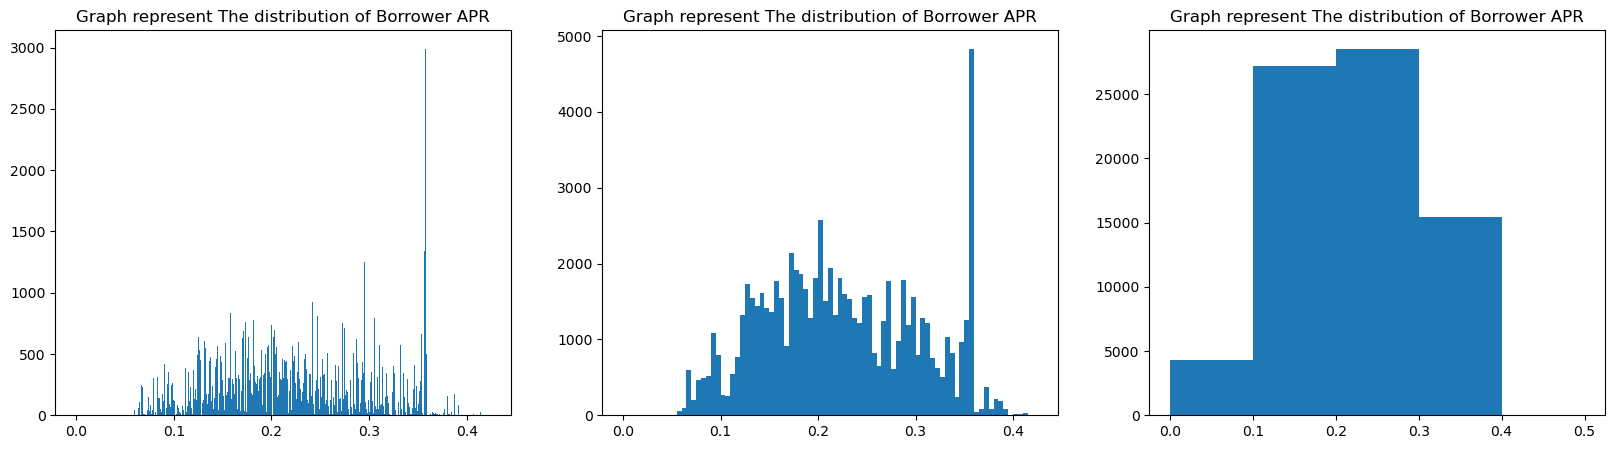

In [116]:
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5])
# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1,3,1)
bins = np.arange(0,df_new['BorrowerAPR'].max()+0.001,0.001)
plt.hist(data=df_new,x ='BorrowerAPR',bins=bins)
plt.title('Graph represent The distribution of Borrower APR');
# histogram on right, example of too-small bin size
plt.subplot(1,3,2)
bins = np.arange(0,df_new['BorrowerAPR'].max()+0.005,0.005)
plt.hist(data=df_new,x ='BorrowerAPR',bins=bins);
plt.title('Graph represent The distribution of Borrower APR');
# histogram on right, example of too-small bin size
plt.subplot(1,3,3)
bins = np.arange(0,df_new['BorrowerAPR'].max()+0.1,0.1)
plt.hist(data=df_new,x ='BorrowerAPR',bins=bins);
plt.title('Graph represent The distribution of Borrower APR');

<p>I polt three graph for the borrow APR  with different bins to interpreat the distribution more clearly,So the distribution it seems multimodal it is multiple peack at different points but thir is a big peak approximately around 0.35/6 </p>

## DebtToIncomeRatio Distribution

In [117]:
df_new['DebtToIncomeRatio'].describe()

count    75489.000000
mean         0.258016
std          0.321920
min          0.000000
25%          0.150000
50%          0.220000
75%          0.320000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

/Users/muluneh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


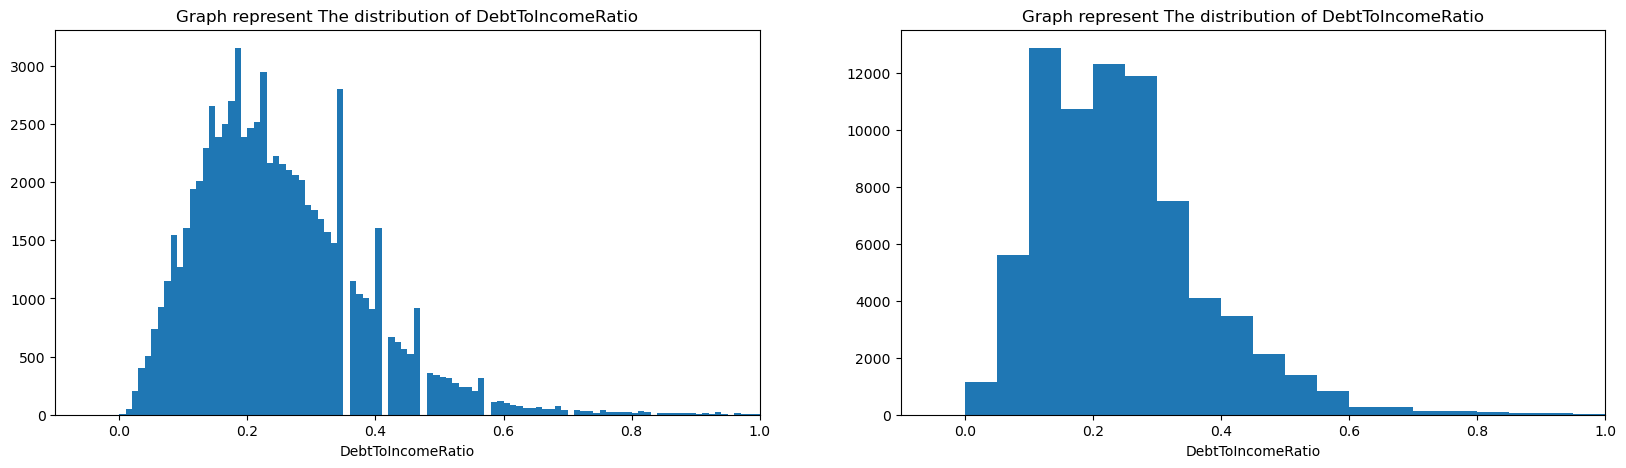

In [118]:
# distribution plot of DebtToIncomeRatio.
# get a large plot area.
plt.figure(figsize = [20, 5])
# first plot.
plt.subplot(1,2,1)
bin_edges = np.arange(0, df_new['DebtToIncomeRatio'].max()+1, 0.01)
sns.distplot(df_new['DebtToIncomeRatio'], bins = bin_edges, kde = False,hist_kws = {'alpha' : 1})
plt.xlim(-.1, 1)
plt.title("Graph represent The distribution of DebtToIncomeRatio");
# second plot.
plt.subplot(1,2,2)
bin_edges = np.arange(0, df_new['DebtToIncomeRatio'].max()+1, 0.05)
sns.distplot(df_new['DebtToIncomeRatio'], bins = bin_edges, kde = False,hist_kws = {'alpha' : 1})
plt.xlim(-.1, 1)
plt.title("Graph represent The distribution of DebtToIncomeRatio");

<p>As we can see from the  plot the DebtToIncomeRation is multimodal with the multiple peack points the distribtution is righ skewed</p>

## Monthly Loan Payment Distribution

In [119]:
df_new['MonthlyLoanPayment'].describe()

count    75489.000000
mean       295.915946
std        189.441572
min          0.000000
25%        158.870000
50%        256.660000
75%        392.420000
max       2251.510000
Name: MonthlyLoanPayment, dtype: float64

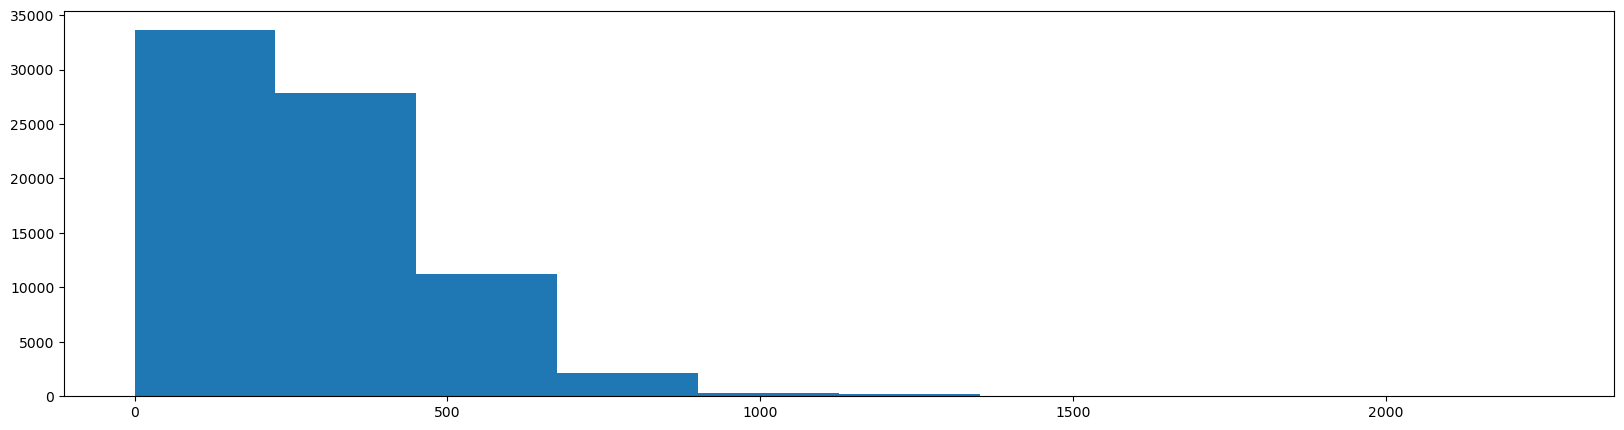

In [120]:
# plot for the MonthlyLoanPayment.
bins = np.arange(0,df_new['MonthlyLoanPayment'].max()+40,40)
plt.hist(data =df_new,x='MonthlyLoanPayment');

<p>AS we can see from the graph the distribution is right skewed to inteperate clearly we need to transform the data using log transformation scale.</p>

In [121]:
np.log10(df_new['MonthlyLoanPayment']).describe()

/Users/muluneh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    7.548900e+04
mean             -inf
std               NaN
min              -inf
25%      2.201042e+00
50%      2.409358e+00
75%      2.593751e+00
max      3.352474e+00
Name: MonthlyLoanPayment, dtype: float64

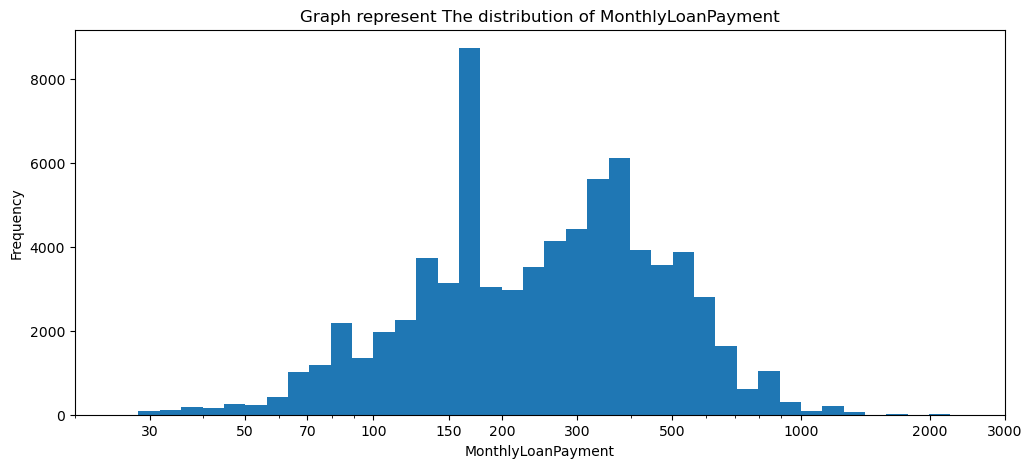

In [122]:
# Resize the plot
plt.figure(figsize=[12,5])
# Get the ticks for bins between [0 - maximum weight]
bins = 10**np.arange(0,3.36,0.05)
# Generate the x-ticks you want to apply
tickes = [30,50,70,100,150,200,300,500,1000,2000,3000]
labels = ['{}'.format(v) for v in tickes]
# Plot the histogram
plt.hist(data=df_new,x='MonthlyLoanPayment',bins = bins)
plt.xlim(20,3000)
plt.xscale('log')
plt.xlabel('MonthlyLoanPayment')
plt.ylabel("Frequency")
plt.title("Graph represent The distribution of MonthlyLoanPayment")
plt.xticks(tickes,labels);

<p>Now i can see clearly the distribution of the monthly loan payment is a multimodal their is a peack on multiple points.  </p>

## LoanOriginalAmount Distribution

In [123]:
df_new['LoanOriginalAmount'].describe()

count    75489.000000
mean      9273.639113
std       6404.381139
min       1000.000000
25%       4000.000000
50%       8000.000000
75%      14500.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

Text(0.5, 1.0, 'Graph represent The distribution of LoanOriginalAmount')

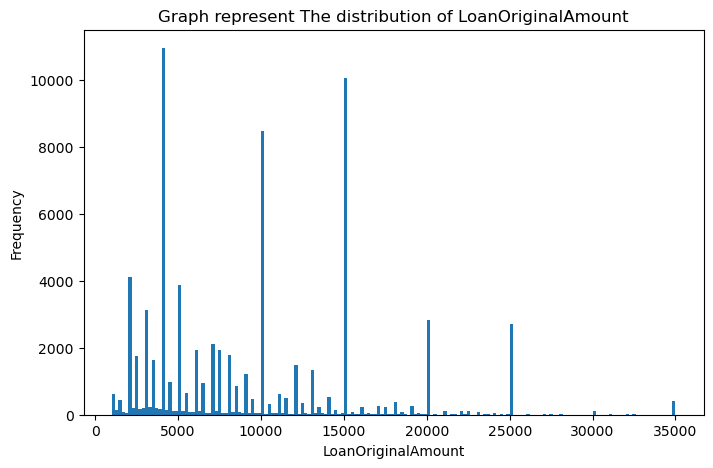

In [124]:
plt.figure(figsize=[8,5])
bins = np.arange(1000,df_new['LoanOriginalAmount'].max()+200,200)
plt.hist(data=df_new,x='LoanOriginalAmount',bins=bins);
plt.xlabel('LoanOriginalAmount')
plt.ylabel("Frequency")
plt.title("Graph represent The distribution of LoanOriginalAmount")

>I have see the distribution of the lone original amount is right skewed some data are distorted it hard to interperate so log transformation is needed to normalize.

In [125]:
np.log10(df_lone['LoanOriginalAmount']).describe()

count    113937.000000
mean          3.795130
std           0.345610
min           3.000000
25%           3.602060
50%           3.812913
75%           4.079181
max           4.544068
Name: LoanOriginalAmount, dtype: float64

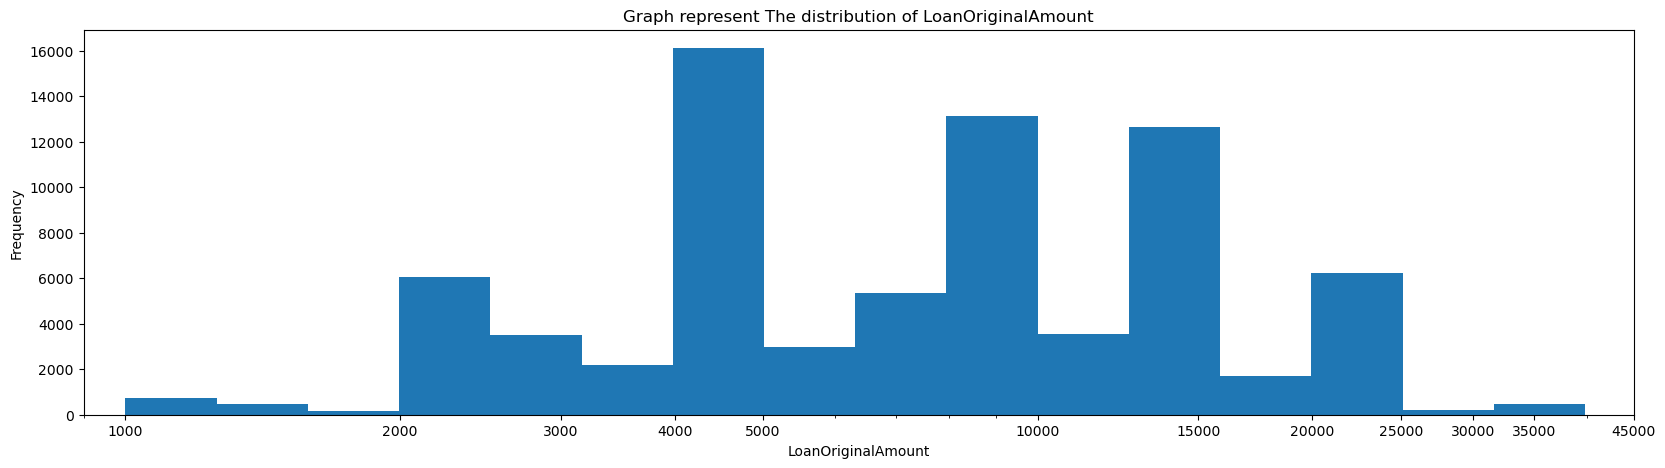

In [126]:
plt.figure(figsize=[20,5])
bins = 10**np.arange(3,4.54+0.1,0.1)
tickes = [1000,2000,3000,4000,5000,10000,15000,20000,25000,30000,35000,45000]
labels = ['{}'.format(v) for v in tickes]
plt.xlabel('LoanOriginalAmount')
plt.ylabel("Frequency")
plt.title("Graph represent The distribution of LoanOriginalAmount")
plt.hist(data=df_new,x='LoanOriginalAmount',bins=bins)
plt.xlim(900,40000)
plt.xscale('log')
plt.xticks(tickes,labels);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
<p>In the numerical disribution analysis i choose four  variables <strong>BorrowerAPR,DebtToIncomeRatio,MonthlyLoanPayment and LoneOriginalAmount.</strong> </p>
<ul>
<p><li>The distribution of borrowers APR looks multimodal. Most of the values are at the range of 0.05 and 0.45. There are no unusual points and no need to perform any transformations.</li></p>
    <p><li>The plot the DebtToIncomeRation also a multimodal with the highest peack point is around 0.2 the distribtution is righ skewed</li></p>
  <p><li>After the log transformation scale the distribution of the monthly loan payment is a large  peack between 173.71</li></p>  
    <p><li>The lone origional amout is a mutlimodel distribution with a multiple peack and values xk multiple.</li></p>   
    
 </ul>
 
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

<p>The distributions of DebtToIncomeRatio is highly right screwed. Most DebtToIncomeRatio are  0.18, but some of them are Surprisingly grater tahn 1,So i need to perform change the data set.To confidently conclude the it must be look forwar the bivariate Exploration.
</p>

## Bivariate Exploration

In [127]:
df_new.head()

,Term,LoanStatus,BorrowerAPR,LenderYield,EstimatedLoss,ProsperRating,BorrowerState,Occupation,EmploymentStatus,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded
1,36,Current,0.12016,0.0820,0.0249,A,CO,Professional,Full-time,0.18,"$50,000-74,999",6125.000000,10000,318.93,1.0
3,36,Current,0.12528,0.0874,0.0249,A,GA,Skilled Labor,Full-time,0.15,"$25,000-49,999",2875.000000,10000,321.45,1.0
4,36,Current,0.24614,0.1985,0.0925,D,MN,Executive,Full-time,0.26,"$100,000+",9583.333333,15000,563.97,1.0
5,60,Current,0.15425,0.1214,0.0449,B,NM,Professional,Full-time,0.36,"$100,000+",8333.333333,15000,342.37,1.0
6,36,Current,0.31032,0.2612,0.1275,E,KS,Sales - Retail,Full-time,0.27,"$25,000-49,999",2083.333333,3000,122.67,1.0


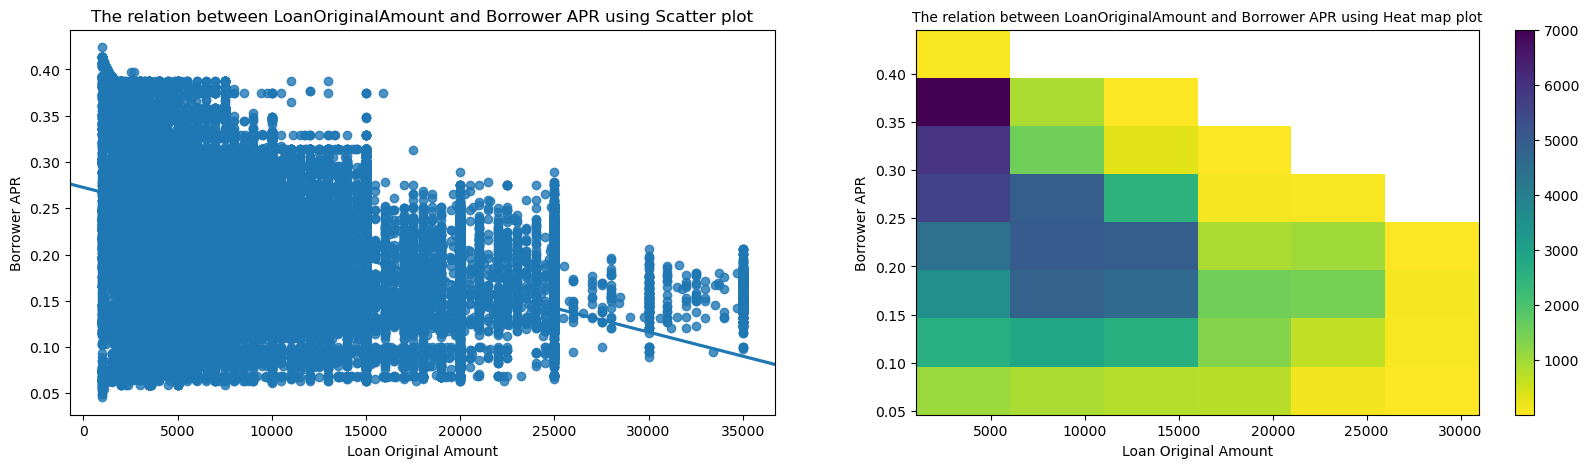

In [128]:
# let see the quantitative and quantitative variable using Scatter plot and Heat Map.
# set a larger plot area
plt.figure(figsize=[20,5])
# first plot scatter plot
plt.subplot(1,2,1)
sns.regplot(data= df_new,x='LoanOriginalAmount',y='BorrowerAPR',truncate=False,x_jitter=0.5)
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower APR')
plt.title('The relation between LoanOriginalAmount and Borrower APR using Scatter plot')
# Second plot heat map.
plt.subplot(1,2,2)
bins_x= np.arange(1000,35000+1000,5000)
bins_y= np.arange(0.046,0.423+0.05,0.05)
plt.hist2d(data=df_new,y= 'BorrowerAPR', x= 'LoanOriginalAmount',cmin=0.5, cmap='viridis_r',bins = [bins_x, bins_y]);
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower APR')
plt.colorbar()
plt.title('The relation between LoanOriginalAmount and Borrower APR using Heat map plot',fontsize=10);

>The borrower APR is negatively correlation with the loan original amount, which mean the more the loan amount, the lower the borrower APR. It also shows that at different size of the loan amount and the borrower APR has a large range, but the range of borrower APR decrease with the increase of loan amount.
> From the heatmap plot the color intensity is hight between 0.35 to 0.40 with the orginal loan amount is 6000/7000

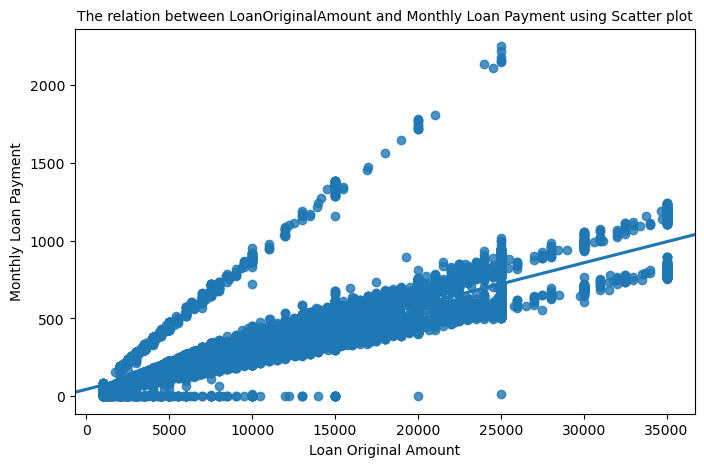

In [129]:
# Scatter plot for the quantitative variables.
plt.figure(figsize=[8,5])
sns.regplot(data= df_new,x='LoanOriginalAmount',y='MonthlyLoanPayment',truncate=False,x_jitter=0.5)
plt.xlabel('Loan Original Amount')
plt.ylabel('Monthly Loan Payment')
plt.title('The relation between LoanOriginalAmount and Monthly Loan Payment using Scatter plot',fontsize=10);

> The pearsons correlation between monthly loan payment and loan original amount is positive the more the original loan mount the Monthly Loan Payment increase almost linearly.

In [130]:
df_new[['MonthlyLoanPayment','BorrowerAPR']].describe()

,MonthlyLoanPayment,BorrowerAPR
count,75489.000000,75489.000000
mean,295.915946,0.224154
std,189.441572,0.079492
min,0.000000,0.045830
25%,158.870000,0.161750
50%,256.660000,0.215660
75%,392.420000,0.288480
max,2251.510000,0.423950


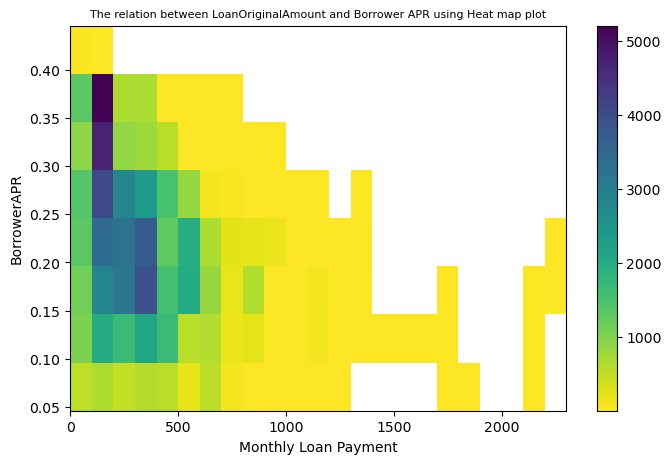

In [131]:
# Heap map plot on the quantitative variables
plt.figure(figsize=[8,5])
bins_x= np.arange(0,2251.51+100,100)
bins_y= np.arange(0.046,0.423+0.05,0.05)
plt.hist2d(data=df_new,y= 'BorrowerAPR', x= 'MonthlyLoanPayment',cmin=0.5, cmap='viridis_r',bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Monthly Loan Payment')
plt.ylabel('BorrowerAPR')
plt.title('The relation between LoanOriginalAmount and Borrower APR using Heat map plot',fontsize=8);

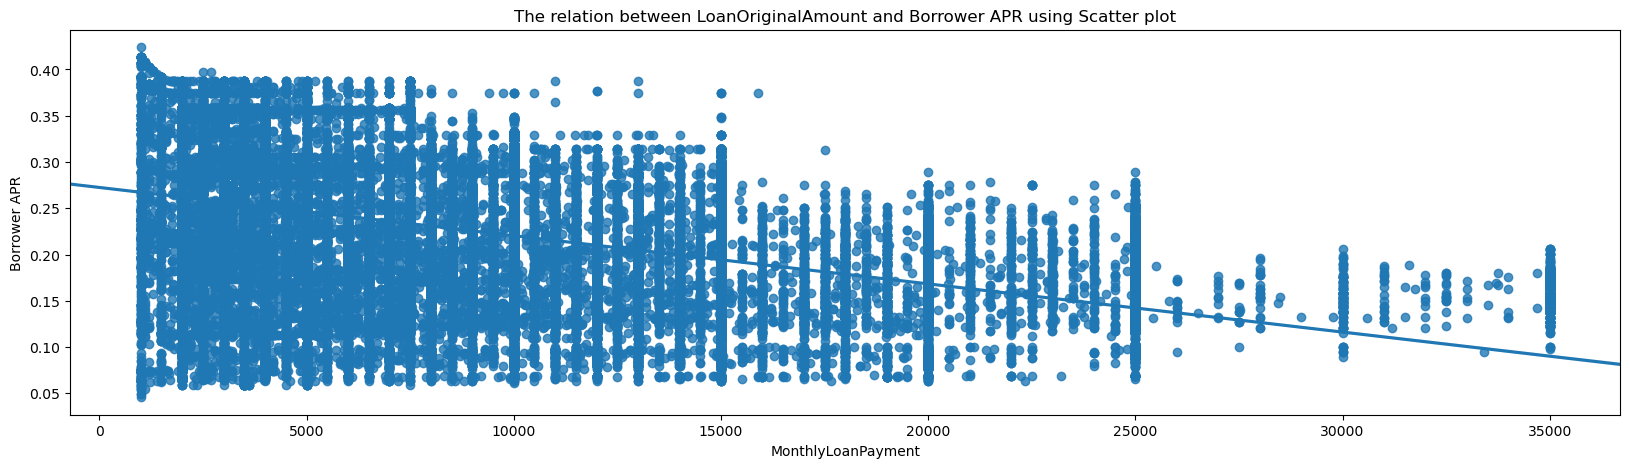

In [132]:
# scatter plot 
sns.regplot(data= df_new,x='LoanOriginalAmount',y='BorrowerAPR',truncate=False,x_jitter=0.5)
plt.xlabel('MonthlyLoanPayment')
plt.ylabel('Borrower APR')
plt.title('The relation between LoanOriginalAmount and Borrower APR using Scatter plot');

> From the reg scatter plot the relation ship bewtwwen the MonthlyLoanPayment and Borrower APR is negative it seems logical the more the MonthlyLoanPayment the less the Borrower APR interset rate.

In [133]:
# let see the correlation of the numeric variables.
quantitative_vars = ['LoanOriginalAmount', 'BorrowerAPR','DebtToIncomeRatio', 'MonthlyLoanPayment']
df_new[quantitative_vars].corr()

,LoanOriginalAmount,BorrowerAPR,DebtToIncomeRatio,MonthlyLoanPayment
LoanOriginalAmount,1.000000,-0.419609,-0.018210,0.916926
BorrowerAPR,-0.419609,1.000000,0.128981,-0.318247
DebtToIncomeRatio,-0.018210,0.128981,1.000000,0.000506
MonthlyLoanPayment,0.916926,-0.318247,0.000506,1.000000


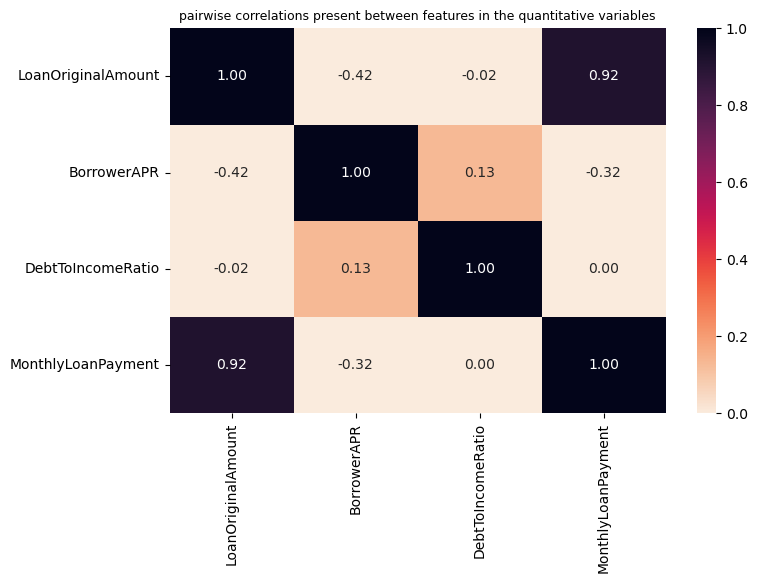

In [134]:
# lets put the correlation in to heatpmap.
plt.figure(figsize = [8, 5])
sns.heatmap(df_new[quantitative_vars].corr(), annot = True, fmt = '.2f',cmap = 'rocket_r', vmin = 0)
plt.title("pairwise correlations present between features in the quantitative variables",fontsize=9);

> From the correlation matrix the i come up wit the follwing conclusions.
      <ol>
           <li>Their is no correlaton relation between DebateToIncomeration and monthly lone payment.</li>
            <li>Their is strong positive correlation between the loan original amout and Monthly loan     payments</li>
        <li>The last conclusion from the pair correlation plot is negative correltion between loan orginal amout and borrower APr.</li>
         </ol>

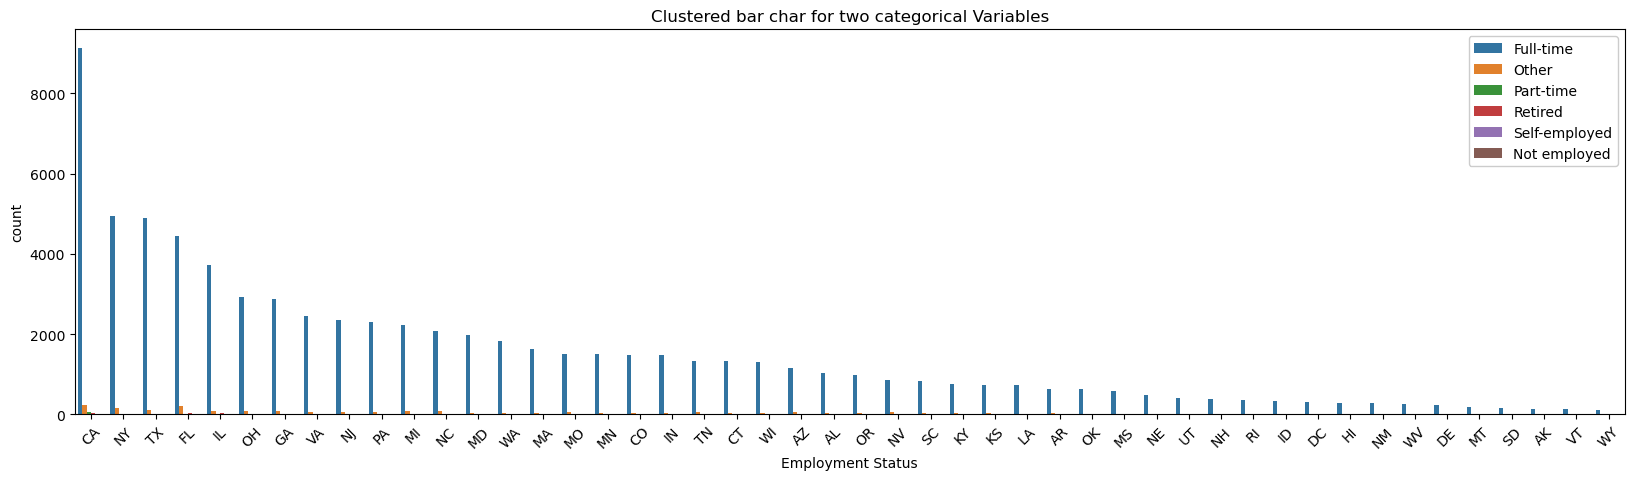

In [135]:
# plot a cluster bar chart
plt.figure(figsize=[20,5])
order_index = df_new['BorrowerState'].value_counts().index
ax = sns.countplot(data=df_new,x='BorrowerState',hue = 'EmploymentStatus',order=order_index);
ax.legend(loc=1,framealpha=1)
plt.xticks(rotation =45)
plt.xlabel('Employment Status')
plt.title('Clustered bar char for two categorical Variables');

> From the cluster bar chart of the Borrower State and Employment Status the customer in california , Newyork and Texas are their job status is other . 

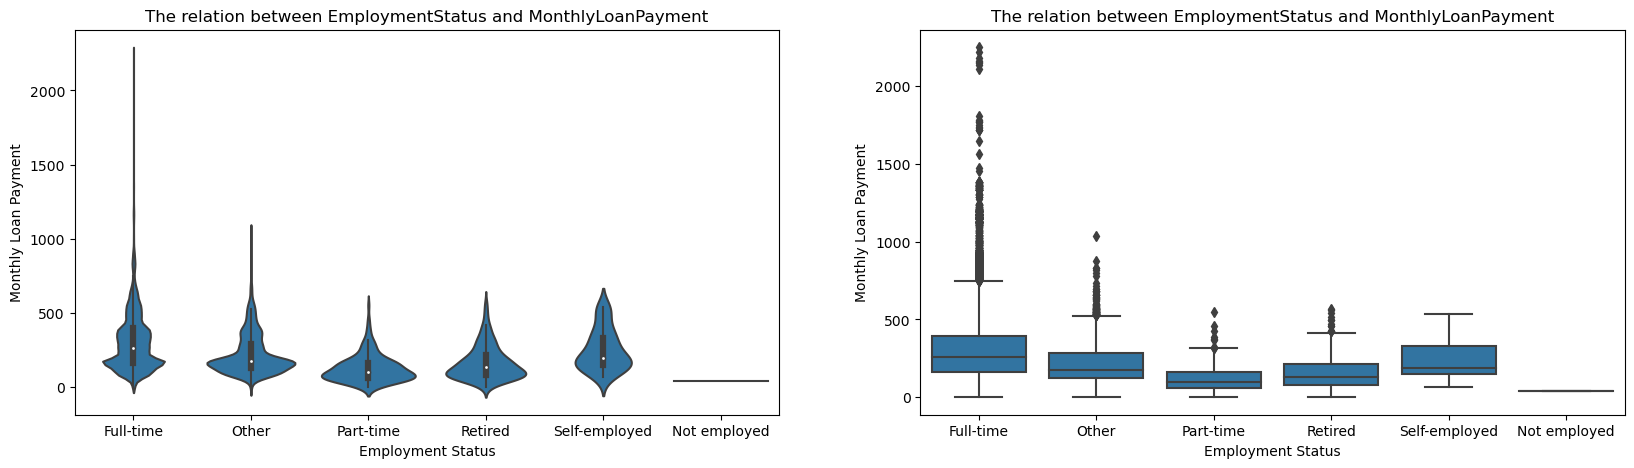

In [136]:
# let see the qualitative and quantitative variable using violin plot and box plot BorrowerAPR
# get a large plot area.
plt.figure(figsize=[20,5])
# the first plot.
plt.subplot(1,2,1)
base_color = sns.color_palette()[0]
sns.violinplot(data= df_new ,x='EmploymentStatus',y='MonthlyLoanPayment',color = base_color);
plt.xlabel('Employment Status')
plt.ylabel('Monthly Loan Payment')
plt.title('The relation between EmploymentStatus and MonthlyLoanPayment');
# the second plot.
plt.subplot(1,2,2)
sns.boxplot(data= df_new ,x='EmploymentStatus',y='MonthlyLoanPayment',color = base_color)
plt.xlabel('Employment Status')
plt.ylabel('Monthly Loan Payment')
plt.title('The relation between EmploymentStatus and MonthlyLoanPayment');

> From the categorical vs numerical data types plots the violin and box plot the full time employee are 

In [137]:
df_new[['LoanStatus','EmploymentStatus']]

,LoanStatus,EmploymentStatus
1,Current,Full-time
3,Current,Full-time
4,Current,Full-time
5,Current,Full-time
6,Current,Full-time
...,...,...
113932,Current,Full-time
113933,FinalPaymentInProgress,Full-time
113934,Current,Full-time
113935,Completed,Full-time


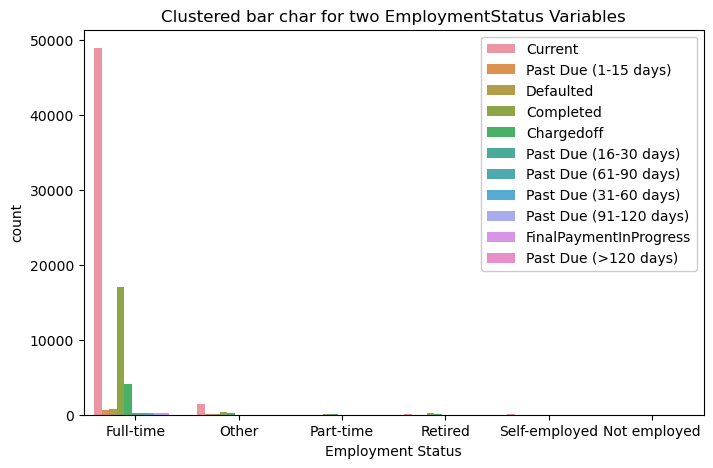

In [138]:
# plot a cluster bar chart
plt.figure(figsize=[8,5])
ax = sns.countplot(data=df_new,x='EmploymentStatus',hue = 'LoanStatus');
ax.legend(loc=1,framealpha=1)
plt.xlabel('Employment Status')
plt.title('Clustered bar char for two EmploymentStatus Variables');

> From the cluser bar chart most of the loan is current and the customers are full time employees..

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From the start I choose Borrowers Rate as I think it has effect on the potential amount the borrower can be entitled to. I noticed that the Borrower Rate has effect on the amount where the amount borrowed increased with higher ratings across all terms

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Borrowers with more monthly income and borrowers rate was borrowing more money and there fore the loan amount is positivey correlated with stated monthly income and borrowers rate.

## Multivariate Exploration

In [139]:
df_new.head()

,Term,LoanStatus,BorrowerAPR,LenderYield,EstimatedLoss,ProsperRating,BorrowerState,Occupation,EmploymentStatus,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded
1,36,Current,0.12016,0.0820,0.0249,A,CO,Professional,Full-time,0.18,"$50,000-74,999",6125.000000,10000,318.93,1.0
3,36,Current,0.12528,0.0874,0.0249,A,GA,Skilled Labor,Full-time,0.15,"$25,000-49,999",2875.000000,10000,321.45,1.0
4,36,Current,0.24614,0.1985,0.0925,D,MN,Executive,Full-time,0.26,"$100,000+",9583.333333,15000,563.97,1.0
5,60,Current,0.15425,0.1214,0.0449,B,NM,Professional,Full-time,0.36,"$100,000+",8333.333333,15000,342.37,1.0
6,36,Current,0.31032,0.2612,0.1275,E,KS,Sales - Retail,Full-time,0.27,"$25,000-49,999",2083.333333,3000,122.67,1.0


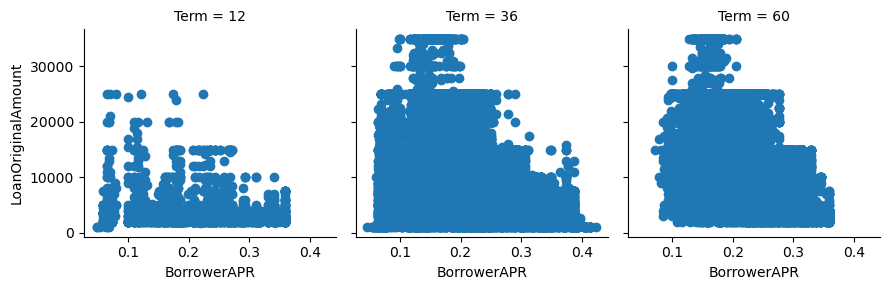

In [140]:
# multivariant plot 
g = sns.FacetGrid(data=df_new,col='Term')
g.map(plt.scatter,'BorrowerAPR','LoanOriginalAmount');

> From the graph we can see that there is a relationship between the ratings and the amount of loan given.The relation is not clearly show let's see other plots.

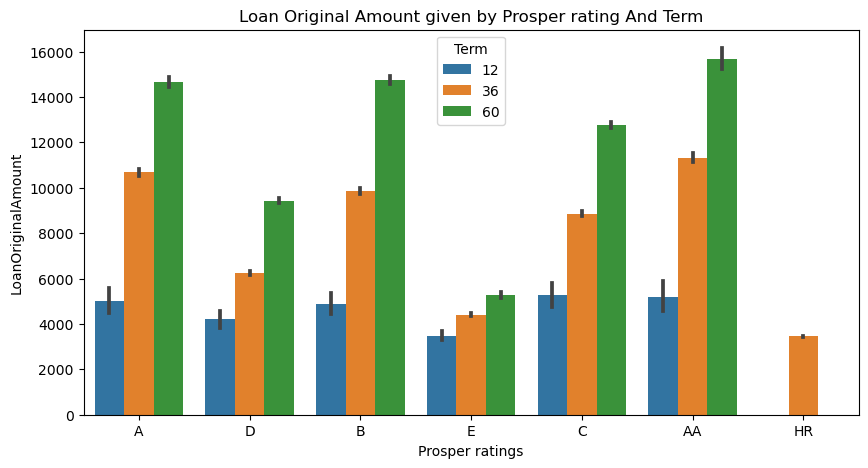

In [141]:
# plot on seborn barpolt.
plt.figure(figsize = [10, 5])
sns.barplot(data=df_new, x='ProsperRating', y='LoanOriginalAmount', hue="Term")
plt.xlabel('Prosper ratings')
plt.ylabel('LoanOriginalAmount')
plt.title('Loan Original Amount given by Prosper rating And Term');

> We can observe from the graph that there is a correlation between the ratings and the loan amount granted. The loan amount increases proportionately to credit rating. Additionally, it appears that the majority of borrowers favored long periods.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>I make the decision to start with the borrower's rate because I believe it has an impact on the maximum amount to which the borrower may be entitled. I saw that the borrower rate had an impact on the amount, causing borrowing to rise with better ratings across all conditions.

### Were there any interesting or surprising interactions between features?

> By analyzing the data, I was able to determine that borrowers with full-time jobs experienced the lowest interest rates over time, while those who are self-employed or unemployed experienced higher rates. 

> Also those employed and those with full time job got lowest interests over time

## Conclusions
According to my investigation, the following characteristics have an impact on how much money is borrowed.
1. Rate of Borrowers - The amount increases with better ratings.
2. Better economic ratings do not necessarily translate into bigger borrowing amounts, but it appears that middle ratings borrowers borrowed more money.
3. Full time employee borrowers received better interest rates than unemployed borrowers, on average.